### Task 2_Diminos Case Study
`Prasad Jadhav`

In [1]:
import pandas as pd
import numpy as np
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
dataset = pd.read_csv('diminos_data.csv')
dataset.shape

(15000, 3)

In [4]:
dataset.head()

,order_id,order_placed_at,order_delivered_at
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056


In [5]:
dataset.tail()

,order_id,order_placed_at,order_delivered_at
14995,1538106,2023-03-27 23:37:05,2023-03-27 23:52:37.409378
14996,1538107,2023-03-27 23:47:38,2023-03-28 00:04:22.672912
14997,1538108,2023-03-27 23:50:16,2023-03-28 00:05:40.676238
14998,1538109,2023-03-27 23:52:44,2023-03-28 00:08:41.810358
14999,1538110,2023-03-27 23:58:20,2023-03-28 00:13:42.499311


In [6]:
print('Number of Rows:',dataset.shape[0])
print('Number of Columns:',dataset.shape[1])

Number of Rows: 15000
Number of Columns: 3


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            15000 non-null  int64 
 1   order_placed_at     15000 non-null  object
 2   order_delivered_at  15000 non-null  object
dtypes: int64(1), object(2)
memory usage: 351.7+ KB


In [8]:
dataset.isnull().sum()

order_id              0
order_placed_at       0
order_delivered_at    0
dtype: int64

In [9]:
dataset.duplicated().sum()

0

In [10]:
dataset['order_placed_at'] = pd.to_datetime(dataset['order_placed_at'])
dataset['order_delivered_at'] = pd.to_datetime(dataset['order_delivered_at'])

In [11]:
dataset['order_placed_at'].dt.day

0         1
1         1
2         1
3         1
4         1
         ..
14995    27
14996    27
14997    27
14998    27
14999    27
Name: order_placed_at, Length: 15000, dtype: int64

In [12]:
dataset['order_placed_at'].dt.month

0        3
1        3
2        3
3        3
4        3
        ..
14995    3
14996    3
14997    3
14998    3
14999    3
Name: order_placed_at, Length: 15000, dtype: int64

In [13]:
dataset['order_placed_at'].dt.year

0        2023
1        2023
2        2023
3        2023
4        2023
         ... 
14995    2023
14996    2023
14997    2023
14998    2023
14999    2023
Name: order_placed_at, Length: 15000, dtype: int64

In [14]:
dataset['order_placed_at'].dt.dayofweek

0        2
1        2
2        2
3        2
4        2
        ..
14995    0
14996    0
14997    0
14998    0
14999    0
Name: order_placed_at, Length: 15000, dtype: int64

In [15]:
dataset['order_placed_at'].dt.day_name()

0        Wednesday
1        Wednesday
2        Wednesday
3        Wednesday
4        Wednesday
           ...    
14995       Monday
14996       Monday
14997       Monday
14998       Monday
14999       Monday
Name: order_placed_at, Length: 15000, dtype: object

In [16]:
dataset['day_of_month'] = dataset['order_placed_at'].dt.day
dataset['day_of_week'] = dataset['order_placed_at'].dt.day_name()

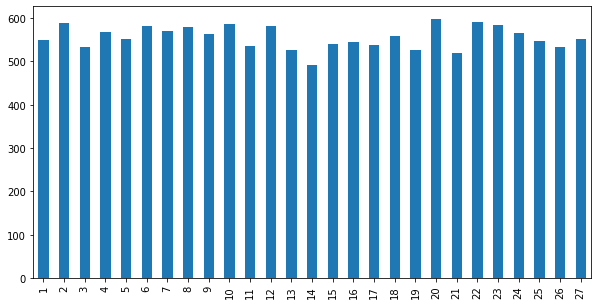

In [17]:
plt.figure(figsize=(10,5))
dataset['day_of_month'].value_counts().sort_index().plot(kind='bar')
plt.show()

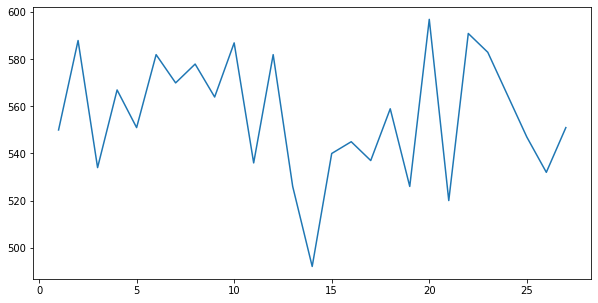

In [18]:
plt.figure(figsize=(10,5))
dataset['day_of_month'].value_counts().sort_index().plot(kind='line')
plt.show()

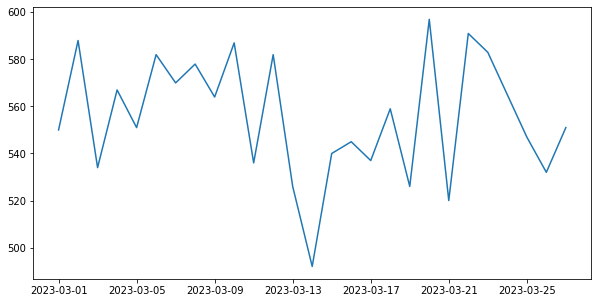

In [40]:
plt.figure(figsize=(10,5))
dataset['order_placed_at'].dt.date.value_counts().plot(kind='line')
plt.show()

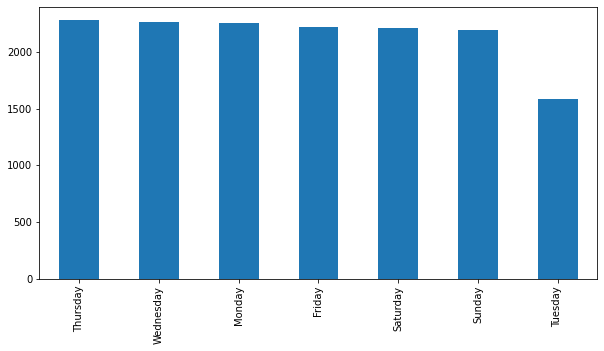

In [19]:
plt.figure(figsize=(10,5))
dataset['day_of_week'].value_counts().plot(kind='bar')
plt.show()

In [20]:
dataset['delivery_time'] = dataset['order_delivered_at'] - dataset['order_placed_at']

In [21]:
# dataset['delivery_time'] = dataset['delivery_time'].dt.total_seconds() / 60

In [22]:
dataset['delivery_time'] = pd.to_timedelta(dataset.delivery_time).dt.components.iloc[: , 2]

In [23]:
dataset['delivery_time'].describe()

count    15000.000000
mean        16.980667
std          5.000396
min          0.000000
25%         15.000000
50%         15.000000
75%         17.000000
max         59.000000
Name: delivery_time, dtype: float64

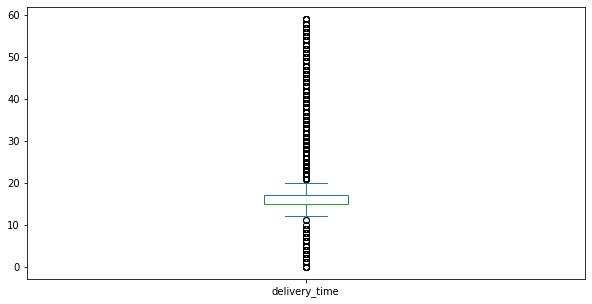

In [24]:
plt.figure(figsize=(10,5))
dataset['delivery_time'].plot(kind='box')
plt.show()

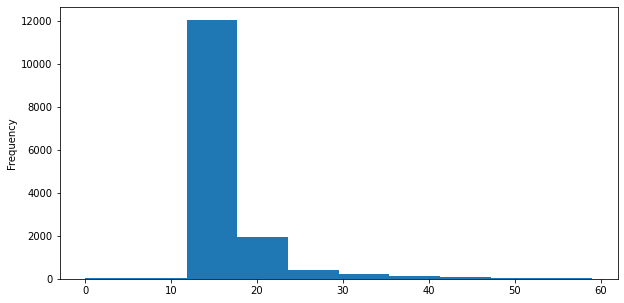

In [38]:
plt.figure(figsize=(10,5))
dataset['delivery_time'].plot(kind='hist')
plt.show()

In [25]:
# dataset = dataset[dataset['delivery_time'] < 40 ]

# plt.figure(figsize=(10,5))
# dataset['delivery_time'].plot(kind='box')
# plt.show()

In [26]:
dataset['delivery_time'].quantile(0.95)

25.0

In [27]:
dataset['delivery_time'].describe()

count    15000.000000
mean        16.980667
std          5.000396
min          0.000000
25%         15.000000
50%         15.000000
75%         17.000000
max         59.000000
Name: delivery_time, dtype: float64

`95th Percentile of Order Delivery time should be less than 31 mins`

In [29]:
print('Average Delivery Time:', dataset['delivery_time'].mean())
print('Minimum Delivery Time:', dataset['delivery_time'].median())
print('Minimum Delivery Time:', dataset['delivery_time'].min())
print('Maximum Delivery Time:', dataset['delivery_time'].max())
print('25% Of Delivery Time:', dataset['delivery_time'].quantile(0.25))
print('50% Of Delivery Time:', dataset['delivery_time'].quantile(0.50))
print('75% Of Delivery Time:', dataset['delivery_time'].quantile(0.75))
print('90% Of Delivery Time:', dataset['delivery_time'].quantile(0.90))
print('95% Of Delivery Time:', dataset['delivery_time'].quantile(0.95))
print('96% Of Delivery Time:', dataset['delivery_time'].quantile(0.96))
print('97% Of Delivery Time:', dataset['delivery_time'].quantile(0.97))
print('98% Of Delivery Time:', dataset['delivery_time'].quantile(0.98))
print('99% Of Delivery Time:', dataset['delivery_time'].quantile(0.99))

Average Delivery Time: 16.980666666666668
Minimum Delivery Time: 15.0
Minimum Delivery Time: 0
Maximum Delivery Time: 59
25% Of Delivery Time: 15.0
50% Of Delivery Time: 15.0
75% Of Delivery Time: 17.0
90% Of Delivery Time: 20.0
95% Of Delivery Time: 25.0
96% Of Delivery Time: 27.0
97% Of Delivery Time: 30.0
98% Of Delivery Time: 34.0
99% Of Delivery Time: 42.0


**`97% deliveries are within 31 minutes`**

# 

### Insights

- Most of the Deliveries done within 10 to 20 minutes
- 97% Deliveries are within 31 minutes
- Delivery time for many orders is above the 30 minutes
- Every day from 1st March 2023 to 27th March 2023 between 500 to 600 Orders has been placed
- Maximum Orders placed on 20th March and minimum order on 14th March